In [1]:
import pandas as pd
import re
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn


seaborn.set()

In [2]:
df=pd.read_csv("dog_rates_tweets.csv")

In [3]:
df

,id,created_at,text
0,994677639364403200,2018-05-10 20:36:44,@Steff88979267 tell them to h*ck off
1,994364904978239488,2018-05-09 23:54:02,@NFLOwnerGBP take it back
2,994363623421153280,2018-05-09 23:48:56,This is Louie. He has misplaced his Cheerio. W...
3,994336722875047936,2018-05-09 22:02:03,@rachaellanaghan ❤️
4,994024065982717952,2018-05-09 01:19:40,This is Captain Jack Wobbles. He is currently ...
...,...,...,...
8510,1027980978910687233,2018-08-10 18:12:18,@GregWWoods thanks for donating $10.00 to @dog...
8511,1027976875811819520,2018-08-10 17:56:00,@DiannaC thanks for donating $10.00 to @dog_ra...
8512,1027970381766963202,2018-08-10 17:30:12,@runnjen @livelikeroo @Goodworld omg Justice y...
8513,1027967697684815873,2018-08-10 17:19:32,@shelbymorganart thanks for donating $10.00 to...


In [4]:
ext = df.text.str.extract(r'(\d+(\.\d+)?)/10', expand=False)
ext

,0,1
0,NaN,NaN
1,NaN,NaN
2,14,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
8510,NaN,NaN
8511,NaN,NaN
8512,NaN,NaN
8513,NaN,NaN


In [5]:
ext1=ext.fillna(0)

In [6]:
ext1

,0,1
0,0,0
1,0,0
2,14,0
3,0,0
4,0,0
...,...,...
8510,0,0
8511,0,0
8512,0,0
8513,0,0


In [7]:
ext2=ext1[0][(ext1[0] != 0)]

In [8]:
ext2

2       14
7       13
8       14
24      13
30      13
        ..
7363    14
7369    14
7381    13
7431    14
7433    13
Name: 0, Length: 1675, dtype: object

In [9]:
ext2_num=pd.to_numeric(ext2)

In [10]:
ext2_num

2       14.0
7       13.0
8       14.0
24      13.0
30      13.0
        ... 
7363    14.0
7369    14.0
7381    13.0
7431    14.0
7433    13.0
Name: 0, Length: 1675, dtype: float64

In [11]:
ext2_num=ext2_num[ext2_num<25.0]

In [12]:
ext2_num

2       14.0
7       13.0
8       14.0
24      13.0
30      13.0
        ... 
7363    14.0
7369    14.0
7381    13.0
7431    14.0
7433    13.0
Name: 0, Length: 1669, dtype: float64

In [13]:
df['rating'] = ext2_num
df = df.loc[ext2_num.index]

In [14]:
df

,id,created_at,text,rating
2,994363623421153280,2018-05-09 23:48:56,This is Louie. He has misplaced his Cheerio. W...,14.0
7,993889039714578432,2018-05-08 16:23:07,This is Manny. He hasn’t seen your croissant. ...,13.0
8,993629544463642624,2018-05-07 23:11:58,This is Libby. She leap. 14/10\n(IG: libbythef...,14.0
24,992198572664860672,2018-05-04 00:25:48,This is Rosie. She thought Coachella was this ...,13.0
30,991744041351090177,2018-05-02 18:19:39,This is Riley. He’ll be your chauffeur this ev...,13.0
...,...,...,...,...
7363,1032725635888803841,2018-08-23 20:25:53,This is Noodles. He had brain surgery earlier ...,14.0
7369,1032310288652152832,2018-08-22 16:55:26,This is Pingo and Nina. They are believed to b...,14.0
7381,1031696422813544448,2018-08-21 00:16:09,This is Nikita. She got caught in some wild fl...,13.0
7431,1029767403545288706,2018-08-15 16:30:55,This is Winston. He came home for the first ti...,14.0


In [15]:
# Changing created_at column type from object to datetime 
df['created_at'] = pd.to_datetime(df['created_at'], format="%Y-%m-%d %H:%M:%S")

In [16]:
def to_timestamp(dt):
    return dt.timestamp()
df['timestamp'] = df['created_at'].apply(to_timestamp)

In [17]:
fit = stats.linregress(df['timestamp'], df['rating'])

In [18]:

df['predict'] = df['timestamp']*fit.slope + fit.intercept

In [19]:
df

,id,created_at,text,rating,timestamp,predict
2,994363623421153280,2018-05-09 23:48:56,This is Louie. He has misplaced his Cheerio. W...,14.0,1.525910e+09,13.185763
7,993889039714578432,2018-05-08 16:23:07,This is Manny. He hasn’t seen your croissant. ...,13.0,1.525797e+09,13.181785
8,993629544463642624,2018-05-07 23:11:58,This is Libby. She leap. 14/10\n(IG: libbythef...,14.0,1.525735e+09,13.179609
24,992198572664860672,2018-05-04 00:25:48,This is Rosie. She thought Coachella was this ...,13.0,1.525394e+09,13.167614
30,991744041351090177,2018-05-02 18:19:39,This is Riley. He’ll be your chauffeur this ev...,13.0,1.525285e+09,13.163804
...,...,...,...,...,...,...
7363,1032725635888803841,2018-08-23 20:25:53,This is Noodles. He had brain surgery earlier ...,14.0,1.535056e+09,13.507338
7369,1032310288652152832,2018-08-22 16:55:26,This is Pingo and Nina. They are believed to b...,14.0,1.534957e+09,13.503856
7381,1031696422813544448,2018-08-21 00:16:09,This is Nikita. She got caught in some wild fl...,13.0,1.534811e+09,13.498710
7431,1029767403545288706,2018-08-15 16:30:55,This is Winston. He came home for the first ti...,14.0,1.534351e+09,13.482540


In [20]:
fit.slope, fit.intercept

(3.515929974847721e-08, -40.46415480898916)

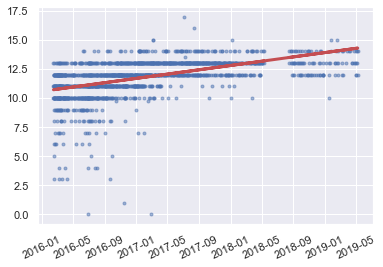

In [21]:
# Creating scatterplot of date against rating
plt.xticks(rotation=25)
plt.plot(df['created_at'].values, df['rating'], 'b.', alpha=0.5)
plt.plot(df['created_at'].values, df['predict'], 'r-', linewidth=3)
plt.show()